In [1]:
import sqlite3 as sql
import pandas as pd

## Sqlite3

Para este capítulo usaremos o SQLite: [https://sqlite.org/index.html](https://sqlite.org/index.html)

In [2]:
sql.sqlite_version

'3.45.1'

In [3]:
pd.__version__

'2.3.0'

# Conectando no Banco de Dados com Linguagem Python

In [4]:
# Conecta no banco de dados
con = sql.connect('cap12_dsa.db')

In [5]:
# Abre um cursor para percorrer os dados no banco de dados
cursor = con.cursor()

In [6]:
# Query SQL para extrair os nomes das colunas no banco de dados
sql_query = '''SELECT name FROM sqlite_master WHERE type = 'table';'''

In [7]:
# Executa a query
cursor.execute(sql_query)

In [8]:
# Visualiza o resultado
display(cursor.fetchall())

[('tb_vendas_dsa',)]

> A query abaixo retorna todas as linhas e todas as colunas da tabela.

In [9]:
# Cria uma instrução SQL
query1 = 'SELECT * FROM tb_vendas_dsa'

In [10]:
# Executa a query no banco de dados
cursor.execute(query1)

In [11]:
# List comprehension para visualizar os nomes das colunas
nomes_colunas = [description[0] for description in cursor.description]

In [12]:
display(nomes_colunas)

['ID_Pedido',
 'ID_Cliente',
 'Nome_Produto',
 'Valor_Unitario',
 'Unidades_Vendidas',
 'Custo']

In [13]:
# Retorna os dados da execução da query
dados = cursor.fetchall()

In [14]:
dados

[(1, 63, 'Produto_38', 154.03, 7, 92.42),
 (2, 49, 'Produto_8', 171.52, 5, 102.91),
 (3, 83, 'Produto_39', 28.97, 13, 17.38),
 (4, 37, 'Produto_2', 104.55, 4, 62.73),
 (5, 19, 'Produto_1', 77.21, 19, 46.33),
 (6, 87, 'Produto_36', 161.97, 13, 97.18),
 (7, 59, 'Produto_24', 101.17, 7, 60.7),
 (8, 48, 'Produto_31', 92.03, 9, 55.22),
 (9, 73, 'Produto_4', 116.57, 6, 69.94),
 (10, 98, 'Produto_45', 46.16, 4, 27.7),
 (11, 86, 'Produto_30', 135.55, 12, 81.33),
 (12, 89, 'Produto_45', 119.4, 11, 71.64),
 (13, 96, 'Produto_11', 96.63, 13, 57.98),
 (14, 29, 'Produto_50', 191.3, 10, 114.78),
 (15, 63, 'Produto_21', 191.28, 14, 114.77),
 (16, 30, 'Produto_22', 67.58, 17, 40.55),
 (17, 5, 'Produto_41', 33.22, 2, 19.93),
 (18, 97, 'Produto_33', 67.77, 12, 40.66),
 (19, 19, 'Produto_18', 160.68, 15, 96.41),
 (20, 7, 'Produto_17', 34.37, 13, 20.62),
 (21, 79, 'Produto_1', 161.33, 15, 96.8),
 (22, 36, 'Produto_45', 184.7, 11, 110.82),
 (23, 94, 'Produto_21', 11.57, 1, 6.94),
 (24, 51, 'Produto_16', 10

# Aplicando Linguagem SQL Direto no Banco de Dados com Linguagem Python

In [15]:
# Cria uma instrução SQL para calcular a média de unidades vendidas
query2 = 'SELECT AVG(Unidades_Vendidas) FROM tb_vendas_dsa'

In [16]:
# Executa a query no banco de dados
cursor.execute(query2)

In [17]:
# Visualiza o resultado
display(cursor.fetchall())

[(10.506,)]

In [18]:
# Cria uma instrução SQL para calcular a média de unidades vendidas por produto
query3 = 'SELECT Nome_Produto, AVG(Unidades_Vendidas) FROM tb_vendas_dsa GROUP BY Nome_Produto'

In [19]:
# Executa a query no banco de dados
cursor.execute(query3)

In [20]:
# Visualiza o resultado
cursor.fetchall()

[('Produto_1', 12.0),
 ('Produto_10', 9.5),
 ('Produto_11', 14.181818181818182),
 ('Produto_12', 8.846153846153847),
 ('Produto_13', 6.0),
 ('Produto_14', 9.166666666666666),
 ('Produto_15', 9.75),
 ('Produto_16', 8.25),
 ('Produto_17', 11.714285714285714),
 ('Produto_18', 13.083333333333334),
 ('Produto_19', 9.727272727272727),
 ('Produto_2', 9.25),
 ('Produto_20', 7.555555555555555),
 ('Produto_21', 10.285714285714286),
 ('Produto_22', 13.6875),
 ('Produto_23', 10.818181818181818),
 ('Produto_24', 12.272727272727273),
 ('Produto_25', 9.538461538461538),
 ('Produto_26', 9.363636363636363),
 ('Produto_27', 11.1),
 ('Produto_28', 9.0),
 ('Produto_29', 9.692307692307692),
 ('Produto_3', 8.909090909090908),
 ('Produto_30', 9.875),
 ('Produto_31', 7.9),
 ('Produto_32', 11.923076923076923),
 ('Produto_33', 12.285714285714286),
 ('Produto_34', 8.1),
 ('Produto_35', 9.0),
 ('Produto_36', 9.090909090909092),
 ('Produto_37', 11.0),
 ('Produto_38', 12.8),
 ('Produto_39', 12.666666666666666),
 ('

In [21]:
# Cria uma instrução SQL para calcular a média de unidades vendidas por produto,
# quando o valor unitário for maior que 199
query4 = '''SELECT Nome_Produto, AVG(Unidades_Vendidas) 
            FROM tb_vendas_dsa
            WHERE Valor_Unitario > 199
            GROUP BY Nome_Produto'''

In [22]:
#Executa a query no banco de dados
cursor.execute(query4)

In [23]:
# Visualiza o resultado
cursor.fetchall()

[('Produto_11', 1.0),
 ('Produto_15', 8.0),
 ('Produto_17', 14.0),
 ('Produto_20', 7.0),
 ('Produto_39', 16.0)]

In [24]:
# Cria uma instrução SQL para calcular a média de unidades vendidas por produto,
# quando o valor unitário for maior que 199, mas somente se a média de unidades vendidas for maior que 10
query5 = '''SELECT Nome_Produto, AVG(Unidades_Vendidas)
            FROM tb_vendas_dsa
            WHERE Valor_Unitario > 199
            GROUP BY Nome_Produto
            HAVING AVG(Unidades_Vendidas)'''

In [25]:
#Executa a query no banco de dados
cursor.execute(query5)

In [26]:
# Visualiza o resultado
cursor.fetchall()

[('Produto_11', 1.0),
 ('Produto_15', 8.0),
 ('Produto_17', 14.0),
 ('Produto_20', 7.0),
 ('Produto_39', 16.0)]

In [27]:
#Fecha o cursor e encerra a conexão
cursor.close()
con.close()

# Aplicando Linguagem SQL na Sintaxe do Pandas com Linguagem Python

In [28]:
#conecta um banco de dados
con = sql.connect('cap12_dsa.db')

In [29]:
#Abre um cusrsor para percorrer os dados no banco de dados
cursor = con.cursor()

In [30]:
#Criar uma instrução SQL
query = 'SELECT * FROM tb_vendas_dsa'

In [31]:
#Execute a query no banco de dados
cursor.execute(query)

In [32]:
#Retorna os dados da execução da query
dados = cursor.fetchall()

In [34]:
dados

[(1, 63, 'Produto_38', 154.03, 7, 92.42),
 (2, 49, 'Produto_8', 171.52, 5, 102.91),
 (3, 83, 'Produto_39', 28.97, 13, 17.38),
 (4, 37, 'Produto_2', 104.55, 4, 62.73),
 (5, 19, 'Produto_1', 77.21, 19, 46.33),
 (6, 87, 'Produto_36', 161.97, 13, 97.18),
 (7, 59, 'Produto_24', 101.17, 7, 60.7),
 (8, 48, 'Produto_31', 92.03, 9, 55.22),
 (9, 73, 'Produto_4', 116.57, 6, 69.94),
 (10, 98, 'Produto_45', 46.16, 4, 27.7),
 (11, 86, 'Produto_30', 135.55, 12, 81.33),
 (12, 89, 'Produto_45', 119.4, 11, 71.64),
 (13, 96, 'Produto_11', 96.63, 13, 57.98),
 (14, 29, 'Produto_50', 191.3, 10, 114.78),
 (15, 63, 'Produto_21', 191.28, 14, 114.77),
 (16, 30, 'Produto_22', 67.58, 17, 40.55),
 (17, 5, 'Produto_41', 33.22, 2, 19.93),
 (18, 97, 'Produto_33', 67.77, 12, 40.66),
 (19, 19, 'Produto_18', 160.68, 15, 96.41),
 (20, 7, 'Produto_17', 34.37, 13, 20.62),
 (21, 79, 'Produto_1', 161.33, 15, 96.8),
 (22, 36, 'Produto_45', 184.7, 11, 110.82),
 (23, 94, 'Produto_21', 11.57, 1, 6.94),
 (24, 51, 'Produto_16', 10

In [35]:
#Carregar os dados como dataframe do pandas
df = pd.DataFrame(dados,columns=['ID_Pedido',
                                 'ID_Cliente',
                                 'Nome_Produto',
                                 'Valor_Unitario',
                                 'Unidades_Vendidas',
                                 'Custo'])

In [36]:
df.head()

,ID_Pedido,ID_Cliente,Nome_Produto,Valor_Unitario,Unidades_Vendidas,Custo
0,1,63,Produto_38,154.03,7,92.42
1,2,49,Produto_8,171.52,5,102.91
2,3,83,Produto_39,28.97,13,17.38
3,4,37,Produto_2,104.55,4,62.73
4,5,19,Produto_1,77.21,19,46.33


In [37]:
#Fechar e encerrar o cursor
cursor.close()
con.close()

In [38]:
#Calcular a média de unidades vendidas
media_unidades_vendidas = df['Unidades_Vendidas'].mean()

In [39]:
type(media_unidades_vendidas)

numpy.float64

In [41]:
print(media_unidades_vendidas)

10.506


In [42]:
#calcular a média de unidade vendidas por produto
media_unidades_vendidas_por_produto = df.groupby('Nome_Produto')['Unidades_Vendidas'].mean()

In [44]:
print(media_unidades_vendidas_por_produto.head(10))

Nome_Produto
Produto_1     12.000000
Produto_10     9.500000
Produto_11    14.181818
Produto_12     8.846154
Produto_13     6.000000
Produto_14     9.166667
Produto_15     9.750000
Produto_16     8.250000
Produto_17    11.714286
Produto_18    13.083333
Name: Unidades_Vendidas, dtype: float64


In [45]:
media_unidades_vendidas_por_produto.head(10)

Nome_Produto
Produto_1     12.000000
Produto_10     9.500000
Produto_11    14.181818
Produto_12     8.846154
Produto_13     6.000000
Produto_14     9.166667
Produto_15     9.750000
Produto_16     8.250000
Produto_17    11.714286
Produto_18    13.083333
Name: Unidades_Vendidas, dtype: float64

In [ ]:
#Retorna a média de unidades vendidas por produto se o valor unitário for maior qeu 199.
df[df['Valor_Unitario']>199].groupby('Nome_Produto')['Unidades_Vendidas'].mean()

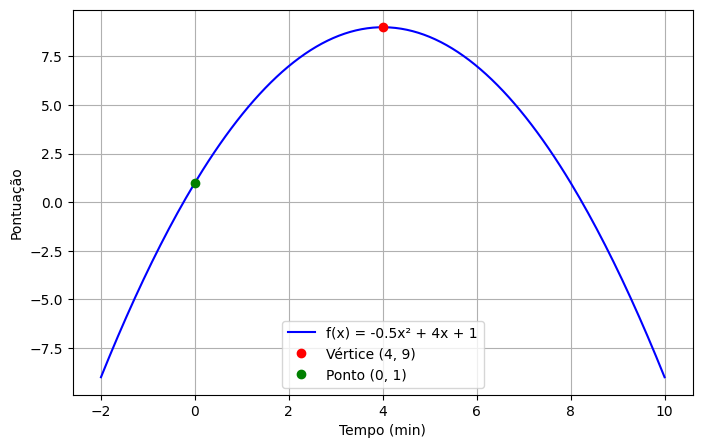

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Função
def f(x):
    return -0.5 * x**2 + 4 * x + 1

# Intervalo de x
x = np.linspace(-2, 10, 200)
y = f(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = -0.5x² + 4x + 1', color='blue')
plt.plot(4, 9, 'ro', label='Vértice (4, 9)')
plt.plot(0, 1, 'go', label='Ponto (0, 1)')
plt.xlabel('Tempo (min)')
plt.ylabel('Pontuação')
plt.legend()
plt.grid(True)
plt.show()


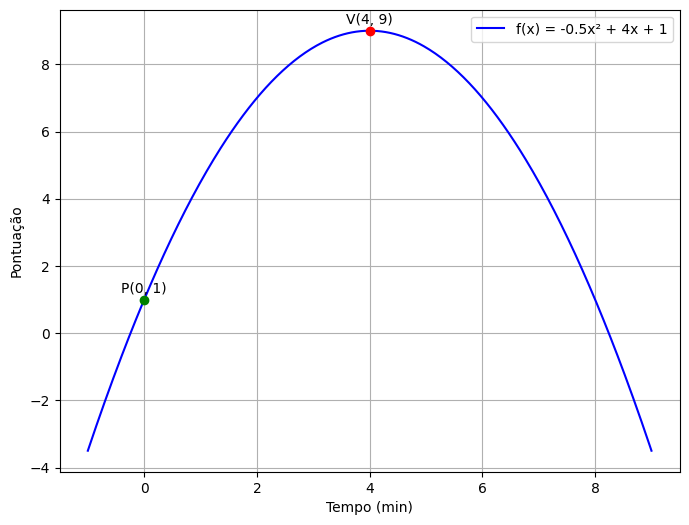

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função
def f(x):
    return -0.5 * x**2 + 4*x + 1

# Intervalo de x
x = np.linspace(-1, 9, 400)
y = f(x)

# Criar figura
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = -0.5x² + 4x + 1', color='blue')


# Grid
plt.grid(True)

# Títulos e legendas
plt.xlabel('Tempo (min)')
plt.ylabel('Pontuação')
plt.legend()

# Marcar pontos relevantes
plt.plot(4, 9, 'ro')       # Vértice
plt.text(4, 9.2, 'V(4, 9)', ha='center')
plt.plot(0, 1, 'go')       # Ponto (0, 1)
plt.text(0, 1.2, 'P(0, 1)', ha='center')

# Mostrar gráfico
plt.show()
